In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
import pandas as pd
import glob

path = r'C:\Users\Admin\sales data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_sales = pd.concat(li, axis=0, ignore_index=True)

In [2]:
df_sales=df_sales.drop_duplicates()

In [3]:
for i in range(0,len(df_sales)):
     if df_sales.iloc[i]['MRP']< df_sales.iloc[i]['Sales Price']:
        x=df_sales.iloc[i]['MRP']
        y=df_sales.iloc[i]['Sales Price']
        df_sales['MRP'].iloc[i]=y
        df_sales['Sales Price'].iloc[i]=x

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
df_sales.head()

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty
0,SKU1181,BRAND041,Cat06,BILL06415,Store 1,2017-05-18,Return,0.01,0.01,-1
1,SKU0457,BRAND011,Cat01,BILL06416,Store 1,2017-05-22,Sale,72.67,72.00,2
2,SKU1465,BRAND018,Cat07,BILL06417,Store 1,2017-07-01,Return,20.00,20.00,-1
3,SKU0774,BRAND017,Cat07,BILL06418,Store 1,2017-07-01,Sale,30.67,30.67,1
4,SKU1695,BRAND017,Cat07,BILL06419,Store 1,2017-07-01,Sale,44.00,44.00,1


In [5]:
df_sales['Sale Date'] = pd.to_datetime(df_sales['Sale Date'])
df_sales['Sale Year'], df_sales['Sale Month'] = df_sales['Sale Date'].dt.year, df_sales['Sale Date'].dt.month

In [6]:
df_sales.drop(df_sales[df_sales['Sale/Return']=='Return'].index,inplace=True)

In [7]:
df_sales.head()

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty,Sale Year,Sale Month
1,SKU0457,BRAND011,Cat01,BILL06416,Store 1,2017-05-22,Sale,72.67,72.00,2,2017,5
3,SKU0774,BRAND017,Cat07,BILL06418,Store 1,2017-07-01,Sale,30.67,30.67,1,2017,7
4,SKU1695,BRAND017,Cat07,BILL06419,Store 1,2017-07-01,Sale,44.00,44.00,1,2017,7
5,SKU1886,BRAND046,Cat04,BILL06420,Store 1,2017-07-01,Sale,66.33,66.33,1,2017,7
6,SKU0906,BRAND017,Cat07,BILL06421,Store 1,2017-07-01,Sale,44.00,44.00,1,2017,7


In [8]:
df_sales['Discount']=(df_sales['MRP']-df_sales['Sales Price'])*100/df_sales['MRP']

In [9]:
df_sales.head()

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty,Sale Year,Sale Month,Discount
1,SKU0457,BRAND011,Cat01,BILL06416,Store 1,2017-05-22,Sale,72.67,72.00,2,2017,5,0.921976
3,SKU0774,BRAND017,Cat07,BILL06418,Store 1,2017-07-01,Sale,30.67,30.67,1,2017,7,0.000000
4,SKU1695,BRAND017,Cat07,BILL06419,Store 1,2017-07-01,Sale,44.00,44.00,1,2017,7,0.000000
5,SKU1886,BRAND046,Cat04,BILL06420,Store 1,2017-07-01,Sale,66.33,66.33,1,2017,7,0.000000
6,SKU0906,BRAND017,Cat07,BILL06421,Store 1,2017-07-01,Sale,44.00,44.00,1,2017,7,0.000000


In [14]:
df_sales.describe()

,MRP,Sales Price,Sales Qty,Sale Year,Sale Month,Discount
count,55822.000000,55822.000000,55822.000000,55822.000000,55822.000000,55185.000000
mean,19.941851,19.487808,1.044463,2017.245835,7.120562,8.403112
std,26.400966,26.166727,0.307192,0.430585,4.078968,26.078279
min,0.000000,0.000000,0.000000,2017.000000,1.000000,0.000000
25%,1.330000,1.330000,1.000000,2017.000000,2.000000,0.000000
50%,7.670000,7.330000,1.000000,2017.000000,9.000000,0.000000
75%,27.330000,26.530000,1.000000,2017.000000,11.000000,0.000000
max,213.320000,213.320000,8.000000,2018.000000,12.000000,100.000000


In [17]:
print(df_sales['SKU Code'].nunique(),df_sales['Brand Code'].nunique(),df_sales['Category'].nunique(),df_sales['Bill Number'].nunique(),df_sales['Store Code'].nunique())

4278 186 11 27114 6


In [19]:
df_sales['Sale Month'].unique()


array([ 5,  7,  8,  6,  9, 10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [20]:
df_5=df_sales[df_sales['Store Code']=='Store 5']

In [37]:
df_5[df_5['Sale Year']==2017]['week'].unique()

array([37, 38, 39, 40, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 52,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 29, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51], dtype=int64)

In [27]:
df_5['week']=df_5['Sale Date'].dt.week
        
        
        

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_5['week'].loc[ df_5['Sale Year']==2018]= df_5['week']+52

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df5_grp=df_5.groupby('week').nunique()

In [54]:
df5_grp.drop(['Store Code','Sale Date','Sale/Return','MRP','Sales Price','Sales Qty','Sale Year','Sale Month','Discount'],inplace=True,axis=1)

In [70]:
df5_grp[['MRP','Sales Price','Discount']]=df_5.groupby('week').mean()[['MRP','Sales Price','Discount']]

In [72]:
df5_grp['Sales Qty']=df_5.groupby('week').sum()['Sales Qty']

In [75]:
df_5.head()

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty,Sale Year,Sale Month,Discount,week
41407,SKU0729,BRAND017,Cat07,BILL02591,Store 5,2017-09-16,Sale,25.33,25.33,1,2017,9,0.0,37
41408,SKU0624,BRAND027,Cat04,BILL02592,Store 5,2017-09-16,Sale,2.00,2.00,1,2017,9,0.0,37
41409,SKU0650,BRAND027,Cat04,BILL02592,Store 5,2017-09-16,Sale,1.33,1.33,1,2017,9,0.0,37
41410,SKU0730,BRAND018,Cat04,BILL02593,Store 5,2017-09-16,Sale,24.67,24.67,1,2017,9,0.0,37
41411,SKU0731,BRAND018,Cat04,BILL02593,Store 5,2017-09-16,Sale,20.67,20.67,1,2017,9,0.0,37


In [78]:
df5_grp.head()

,week,SKU Code,Brand Code,Category,Bill Number,MRP,Sales Price,Discount,Sales Qty
0,1,44,15,4,33,50.056667,50.056667,0.000000,45
1,2,60,17,4,55,51.020000,50.202267,1.563594,75
2,3,92,18,7,91,49.026667,43.450833,8.130081,133
3,4,87,14,3,62,39.926964,37.629375,3.571429,112
4,5,59,17,5,48,42.046857,39.989714,2.857143,70


In [103]:
X=df5_grp.iloc[:,:-1].values
y=df5_grp.iloc[:,[8]].values

In [104]:
X=np.append(np.ones((61,1)).astype(int),X,axis=1)
X

array([[1.00000000e+00, 1.00000000e+00, 4.40000000e+01, 1.50000000e+01,
        4.00000000e+00, 3.30000000e+01, 5.00566667e+01, 5.00566667e+01,
        0.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 6.00000000e+01, 1.70000000e+01,
        4.00000000e+00, 5.50000000e+01, 5.10200000e+01, 5.02022667e+01,
        1.56359445e+00],
       [1.00000000e+00, 3.00000000e+00, 9.20000000e+01, 1.80000000e+01,
        7.00000000e+00, 9.10000000e+01, 4.90266667e+01, 4.34508333e+01,
        8.13008130e+00],
       [1.00000000e+00, 4.00000000e+00, 8.70000000e+01, 1.40000000e+01,
        3.00000000e+00, 6.20000000e+01, 3.99269643e+01, 3.76293750e+01,
        3.57142857e+00],
       [1.00000000e+00, 5.00000000e+00, 5.90000000e+01, 1.70000000e+01,
        5.00000000e+00, 4.80000000e+01, 4.20468571e+01, 3.99897143e+01,
        2.85714286e+00],
       [1.00000000e+00, 6.00000000e+00, 1.39000000e+02, 1.70000000e+01,
        6.00000000e+00, 8.50000000e+01, 3.88290964e+01, 3.76403614e+01,
        1.8

In [113]:
import statsmodels.formula.api as sm
X_opt=X[:,[0,1,5,6,8]]
reg_ols=sm.OLS(endog=y,exog=X_opt).fit()

In [114]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 19 May 2019   Prob (F-statistic):           5.80e-35
Time:                        17:57:32   Log-Likelihood:                -292.86
No. Observations:                  61   AIC:                             595.7
Df Residuals:                      56   BIC:                             606.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.3745     30.489      4.998      0.000      91.299     213.450
x1            -0.6387      0.391     -1.633      0.108      -1.422       0.145
x2             1.7039      0.168     10.166      0.000       1.368       2.040
x3            -4.3497      0.612     -7.113      0.000      -5.575      -3.125
x4             5.4677      0.728      7.512      0.000       4.010       6.926
==============================================================================
Omnibus:                       14.020   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.169
Skew:                           0.891   Prob(JB):                     0.000113
Kurtosis:                       4.994   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
X=df5_grp.iloc[:,[0,4,5,7]].values

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
lr=LinearRegression()

In [132]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [133]:
y_pred_lr=lr.predict(X_test)

In [143]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_lr)

0.9157157322416484

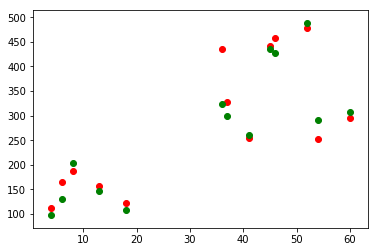

In [152]:
plt.scatter(X_test[:,0],y_test,color='red')
plt.scatter(X_test[:,0],y_pred_lr,color='green')

In [136]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [137]:
y_pred_dr=dr.predict(X_test)

In [144]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_dr)

0.73912041242651

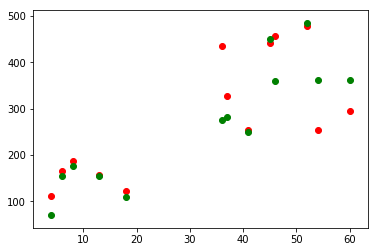

In [153]:
plt.scatter(X_test[:,0],y_test,color='red')
plt.scatter(X_test[:,0],y_pred_dr,color='green')

In [139]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [140]:
y_pred_rfr=rfr.predict(X_test)

In [145]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_rfr)

0.8999830417675914

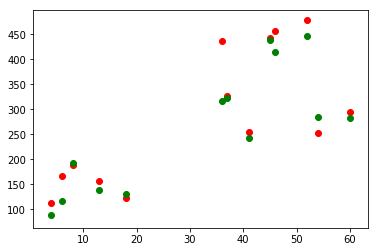

In [154]:
plt.scatter(X_test[:,0],y_test,color='red')
plt.scatter(X_test[:,0],y_pred_rfr,color='green')